In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

In [56]:
df = pd.read_csv("diabetes.csv")

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
df.shape

(768, 9)

In [59]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [61]:
duplicate_rows = df.duplicated()
total_duplicates = duplicate_rows.sum()
print(f"Total duplicate rows in the dataset: {total_duplicates}")

Total duplicate rows in the dataset: 0


In [62]:
zero_counts = (df == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [63]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())


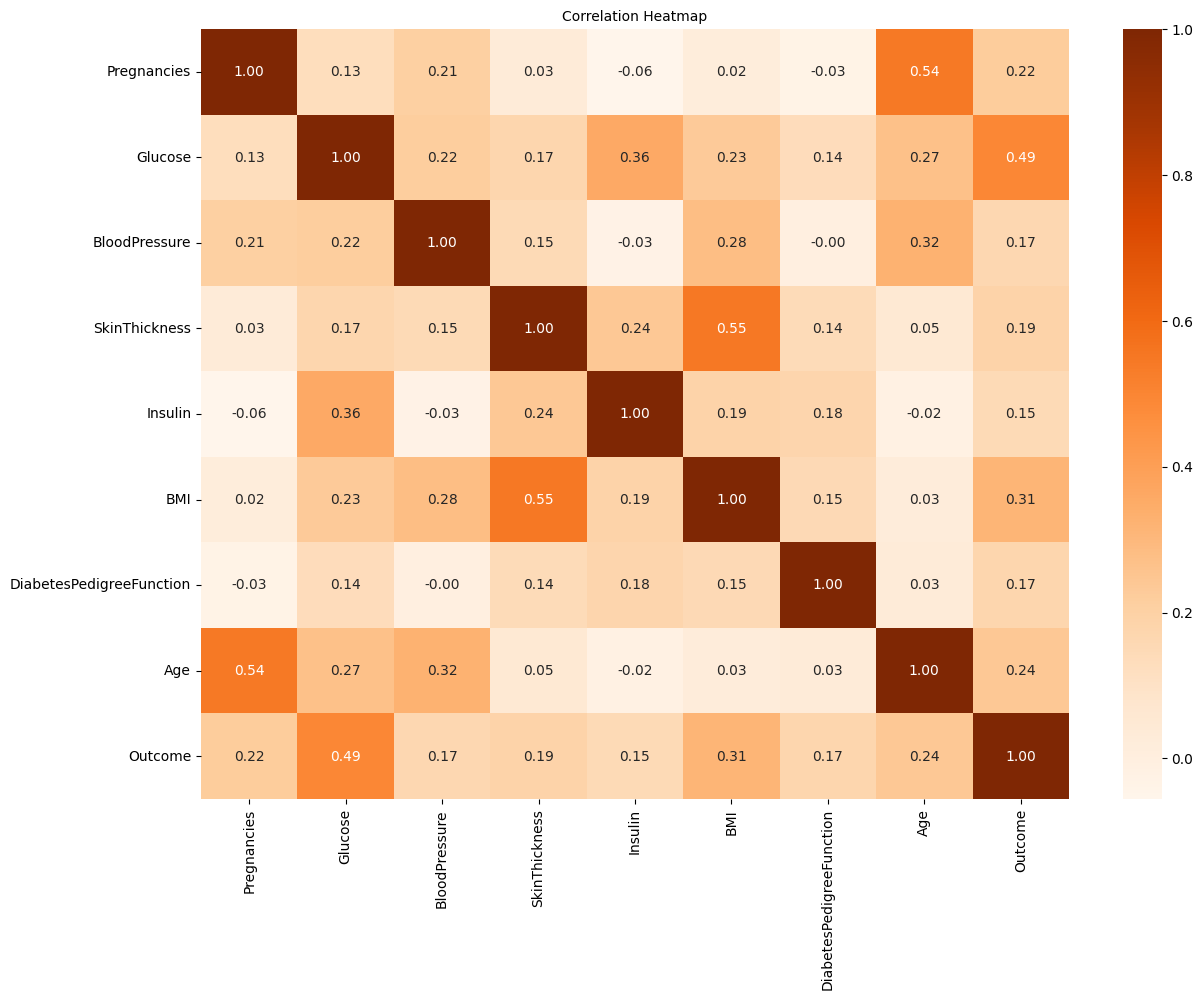

In [64]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Oranges")  
plt.title("Correlation Heatmap", fontsize=10)
plt.show()


C:\Users\Zaid khan\AppData\Local\Temp\ipykernel_7008\2946994478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette=['orange', 'red'])


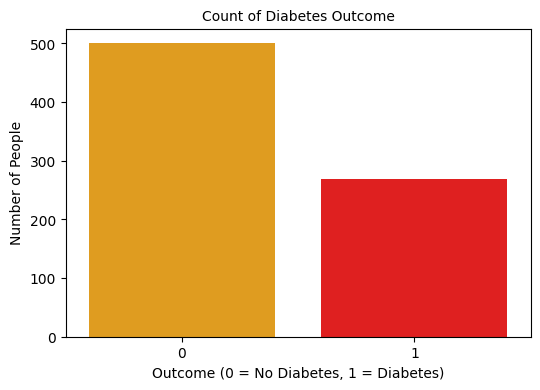

In [65]:
plt.figure(figsize=(6,4))  
sns.countplot(x='Outcome', data=df, palette=['orange', 'red'])
plt.title("Count of Diabetes Outcome", fontsize=10)
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Number of People")
plt.show()



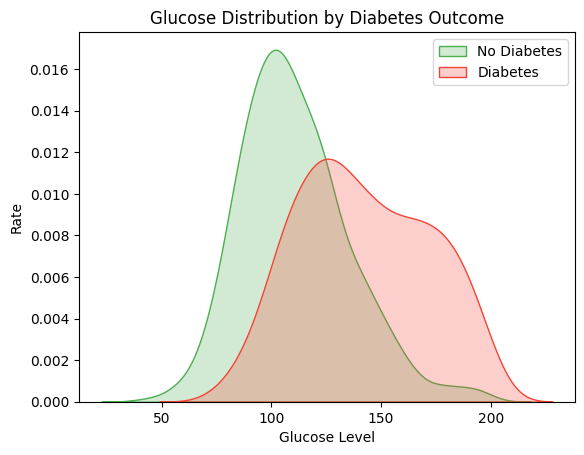

In [66]:
sns.kdeplot(data=df[df['Outcome'] == 0]['Glucose'], label='No Diabetes', fill=True, color='#4CAF50')
sns.kdeplot(data=df[df['Outcome'] == 1]['Glucose'], label='Diabetes', fill=True, color='#F44336')
plt.title("Glucose Distribution by Diabetes Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("Rate")
plt.legend()
plt.show()




C:\Users\Zaid khan\AppData\Local\Temp\ipykernel_7008\1638191729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='BMI', data=df, palette=['#4CAF50', '#F44336'])


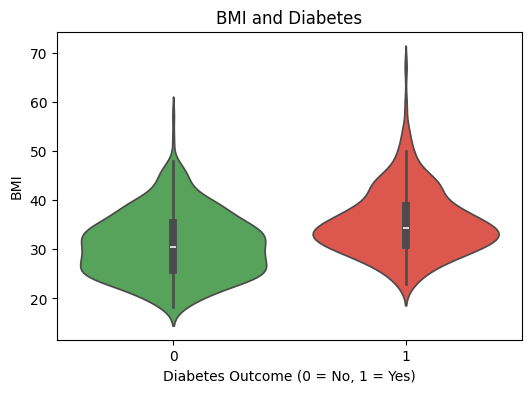

In [67]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Outcome', y='BMI', data=df, palette=['#4CAF50', '#F44336'])
plt.title("BMI and Diabetes")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()


In [68]:
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']


In [69]:
print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [70]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [71]:
scaler = StandardScaler()

In [72]:
X_scaled = scaler.fit_transform(X)

In [73]:
print(X_scaled)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [74]:
#splitting data into train and test data 
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size = 0.2, stratify=Y, random_state=2)

In [75]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [76]:
svm_classifier = SVC()

In [77]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [78]:
gd_srh = GridSearchCV(
    estimator=svm_classifier,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [79]:
gd_srh.fit(X_train, Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [80]:
best_svm = gd_srh.best_estimator_
print("Best Parameters:", gd_srh.best_params_)
y_pred_svm= best_svm.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, y_pred_svm))
print("Classification Report:\n", classification_report(Y_test, y_pred_svm))

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [81]:
cv_scores_svm = cross_val_score(best_svm, X_scaled, Y, cv=5, scoring='accuracy')
print(" SVM 5-Fold Cross-Validation Accuracy Mean:", cv_scores_svm.mean())

 SVM 5-Fold Cross-Validation Accuracy Mean: 0.7643663526016466


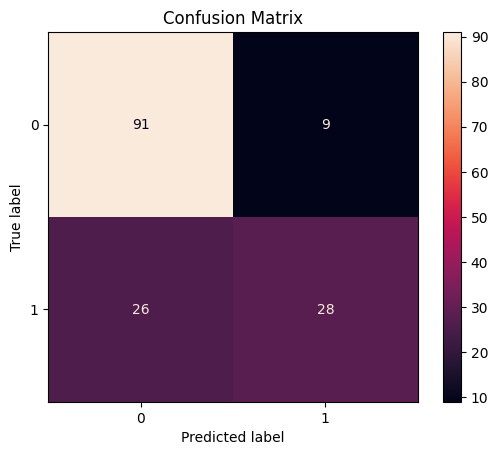

In [82]:
cm = confusion_matrix(Y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='rocket')  
plt.title("Confusion Matrix")
plt.show()

In [83]:
log_classifier = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.1, 0.8, 1, 1.2, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
}

gd_srh = GridSearchCV(log_classifier, param_grid, cv=3, scoring='accuracy') 
gd_srh.fit(X_train, Y_train)

best_log_model = gd_srh.best_estimator_

y_pred_log = best_log_model.predict(X_test)

print("Logistic Regression Test Accuracy:", accuracy_score(Y_test, y_pred_log))
print("Logistic Regression Classification Report:\n", classification_report(Y_test, y_pred_log))



Logistic Regression Test Accuracy: 0.7337662337662337
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.68      0.46      0.55        54

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.73      0.73      0.72       154



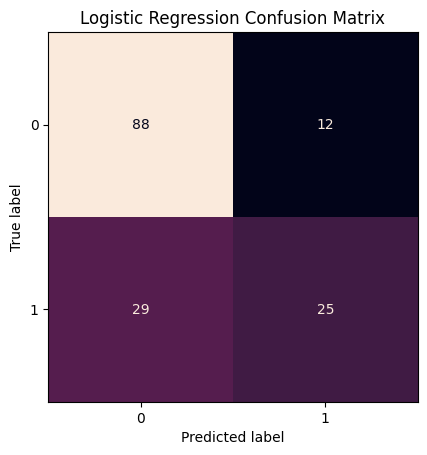

In [84]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='rocket', colorbar=False)  
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [85]:

cv_scores_log = cross_val_score(best_log_model, X_scaled, Y, cv=5, scoring='accuracy')
print("Logistic Regression 5-Fold Cross-Validation Accuracy Mean:", cv_scores_log.mean())

Logistic Regression 5-Fold Cross-Validation Accuracy Mean: 0.7695526695526695


In [86]:
#Random Forest Model
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

gd_srh = GridSearchCV(
    rf_classifier,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
gd_srh.fit(X_train, Y_train)

best_rf_model = gd_srh.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

print("Random Forest Test Accuracy:", accuracy_score(Y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(Y_test, y_pred_rf))



Random Forest Test Accuracy: 0.7597402597402597
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.70      0.56      0.62        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



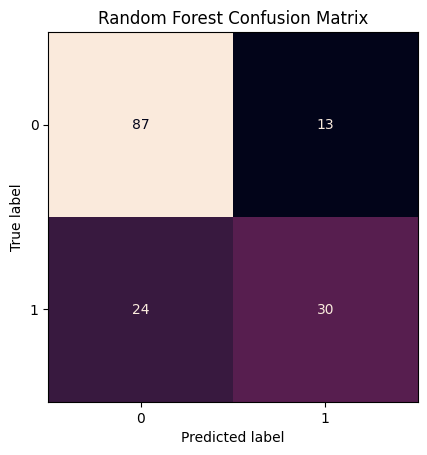

In [87]:
cm = confusion_matrix(Y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='rocket', colorbar=False)  
plt.title("Random Forest Confusion Matrix")
plt.show()

In [88]:
cv_scores_rf = cross_val_score(best_rf_model, X_scaled, Y, cv=5, scoring='accuracy')
print("Random Forest 5-Fold Cross-Validation Accuracy Mean:", cv_scores_rf.mean())

Random Forest 5-Fold Cross-Validation Accuracy Mean: 0.7656735421441304


In [89]:
results = {
    'Model': ['SVM', 'Logistic Regression', 'Random Forest'],
    'Holdout Test Accuracy': [
        accuracy_score(Y_test, y_pred_svm),
        accuracy_score(Y_test, y_pred_log),
        accuracy_score(Y_test, y_pred_rf)
    ],
    'Cross-Validation Accuracy (Mean)': [
        cv_scores_svm.mean(),
        cv_scores_log.mean(),
        cv_scores_rf.mean()
    ]
}

results_df = pd.DataFrame(results)

results_df['Holdout Test Accuracy'] = results_df['Holdout Test Accuracy'].round(4)
results_df['Cross-Validation Accuracy (Mean)'] = results_df['Cross-Validation Accuracy (Mean)'].round(4)

print("\n Final Results Table:\n")
print(results_df)



 Final Results Table:

                 Model  Holdout Test Accuracy  \
0                  SVM                 0.7727   
1  Logistic Regression                 0.7338   
2        Random Forest                 0.7597   

   Cross-Validation Accuracy (Mean)  
0                            0.7644  
1                            0.7696  
2                            0.7657  


In [90]:
#Predictions on the Test Set for each model
y_pred_test_svm = best_svm.predict(X_test)
print("Classification Report for SVM on Test Set:")
print(classification_report(Y_test, y_pred_test_svm))

y_pred_test_log = best_log_model.predict(X_test)
print("Classification Report for Logistic Regression on Test Set:")
print(classification_report(Y_test, y_pred_test_log))

y_pred_test_rf = best_rf_model.predict(X_test)
print("Classification Report for Random Forest on Test Set:")
print(classification_report(Y_test, y_pred_test_rf))

Classification Report for SVM on Test Set:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

Classification Report for Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.68      0.46      0.55        54

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.73      0.73      0.72       154

Classification Report for Random Forest on Test Set:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.70      0.56      0.62        54

    accuracy               

In [91]:
#Making a predictive sytem
input_data = (10,139,80,0,0,27.1,1.441,57)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

# use your trained model here
prediction = best_rf_model.predict(std_data)  # changed classifier to best_rf_model
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[[ 1.82781311  0.57017181  0.62978162 -2.96374541 -0.89735842 -0.77878009
   2.92686858  2.02160968]]
[0]
The person is not diabetic


c:\Users\Zaid khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
